# Linear regression with scikit-learn

Importing the modules

In [24]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import DateFormatter

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from cassandra.cluster import Cluster
from cassandra.metadata import KeyspaceMetadata

Connecting to SensorHUB

In [25]:
cluster = Cluster(["172.20.16.137"], port=30241)
keyspace_name = "sensorhub"
session = cluster.connect(keyspace_name)

Getting data

In [26]:
query = "SELECT sensor, datum, temperatureat2meter, windspeed FROM erti_new WHERE datum >= '2017-01-01 00:00:00' AND  datum <= '2017-01-31 23:59:00' AND sensor=1"
df = pd.DataFrame(list(session.execute(query)))

Clean the dataframe

In [27]:
df['temperatureat2meter'] = df['temperatureat2meter'].replace(to_replace=[-888.8, -777.7, -999.9], value=np.NaN)

In [28]:
df['windspeed'] = df['windspeed'].replace(to_replace=[-888.8, -777.7, -999.9], value=np.NaN)

In [29]:
filtered_df = df[df['temperatureat2meter'].notnull()]

In [30]:
filtered_df = df[df['windspeed'].notnull()]

In [31]:
filtered_df.isnull().values.any()

False

In [32]:
df.tail()

sensor               datum  temperatureat2meter  windspeed
3842       1 2017-01-31 23:00:01                  0.0        0.3
3843       1 2017-01-31 23:10:01                  0.1        0.3
3844       1 2017-01-31 23:20:01                  0.1        0.4
3845       1 2017-01-31 23:30:01                  0.2        0.5
3846       1 2017-01-31 23:50:11                  0.0        0.0

Splitting up the dataset

In [34]:
# x train and test - tempat2m
temp_X_train = pd.DataFrame(df['temperatureat2meter'].iloc[:1500])
temp_X_test = pd.DataFrame(df['temperatureat2meter'].iloc[1501:])

In [35]:
# y train and test - windspeed
wind_Y_train = pd.DataFrame(df['windspeed'].iloc[:1500])
wind_Y_test = pd.DataFrame(df['windspeed'].iloc[1501:])

Instantiate regression model

In [36]:
# skipped some of the cells above
regr = linear_model.LinearRegression()

In [37]:
# train the model
regr.fit(temp_X_train, wind_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [38]:
# make predictions using the test set
wind_y_pred = regr.predict(temp_X_test)

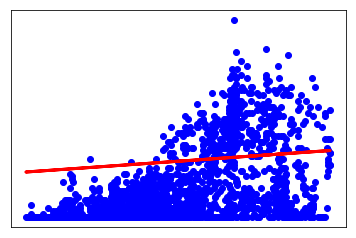

In [39]:
#plot outputs
plt.scatter(temp_X_test, wind_Y_test, color='blue')
plt.plot(temp_X_test, wind_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()